# Comparación entre CART y Random Forest

En este notebook vamos a comparar el rendimiento de CART (Classification And Regression Trees) con Random Forest utilizando el dataset Wine de scikit-learn.

¡Importante! Cuando se exporta un notebook a pdf puede pasar que se trunquen algunas celdas o prints de tablas. Siempre es mejor remitirse directamente al notebook, bajarlo, correrlo y poder modificarlo.

In [1]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree

## 1. Carga y Exploración de Datos

Cargamos el dataset Iris y realizamos un análisis exploratorio básico.

In [2]:
# Cargamos el dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

# Creamos un DataFrame completo para el análisis
df = pd.concat([X, y], axis=1)
df['target'] = df['target'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})

# Mostramos las primeras filas
print("Primeras filas del dataset:")
display(df.head()) # display es más prolija, hace tabla

# Información general del dataset
print("\nInformación del dataset:")
display(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(df.describe())

Primeras filas del dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-

None


Estadísticas descriptivas:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000



Cantidad de muestras por clase:


target
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

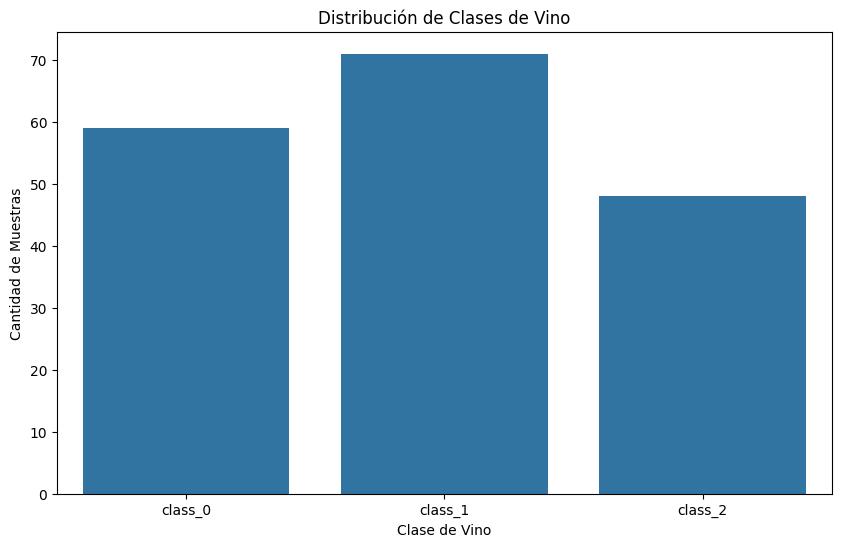

In [3]:
# Contar la cantidad de muestras por clase
print("\nCantidad de muestras por clase:")
class_counts = df['target'].value_counts()
display(class_counts)

# Visualizar la distribución de clases
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df)
plt.title('Distribución de Clases de Vino')
plt.xlabel('Clase de Vino')
plt.ylabel('Cantidad de Muestras')
plt.show()


## 2. Visualización de Datos

Realizamos algunas visualizaciones para entender mejor la distribución de los datos.

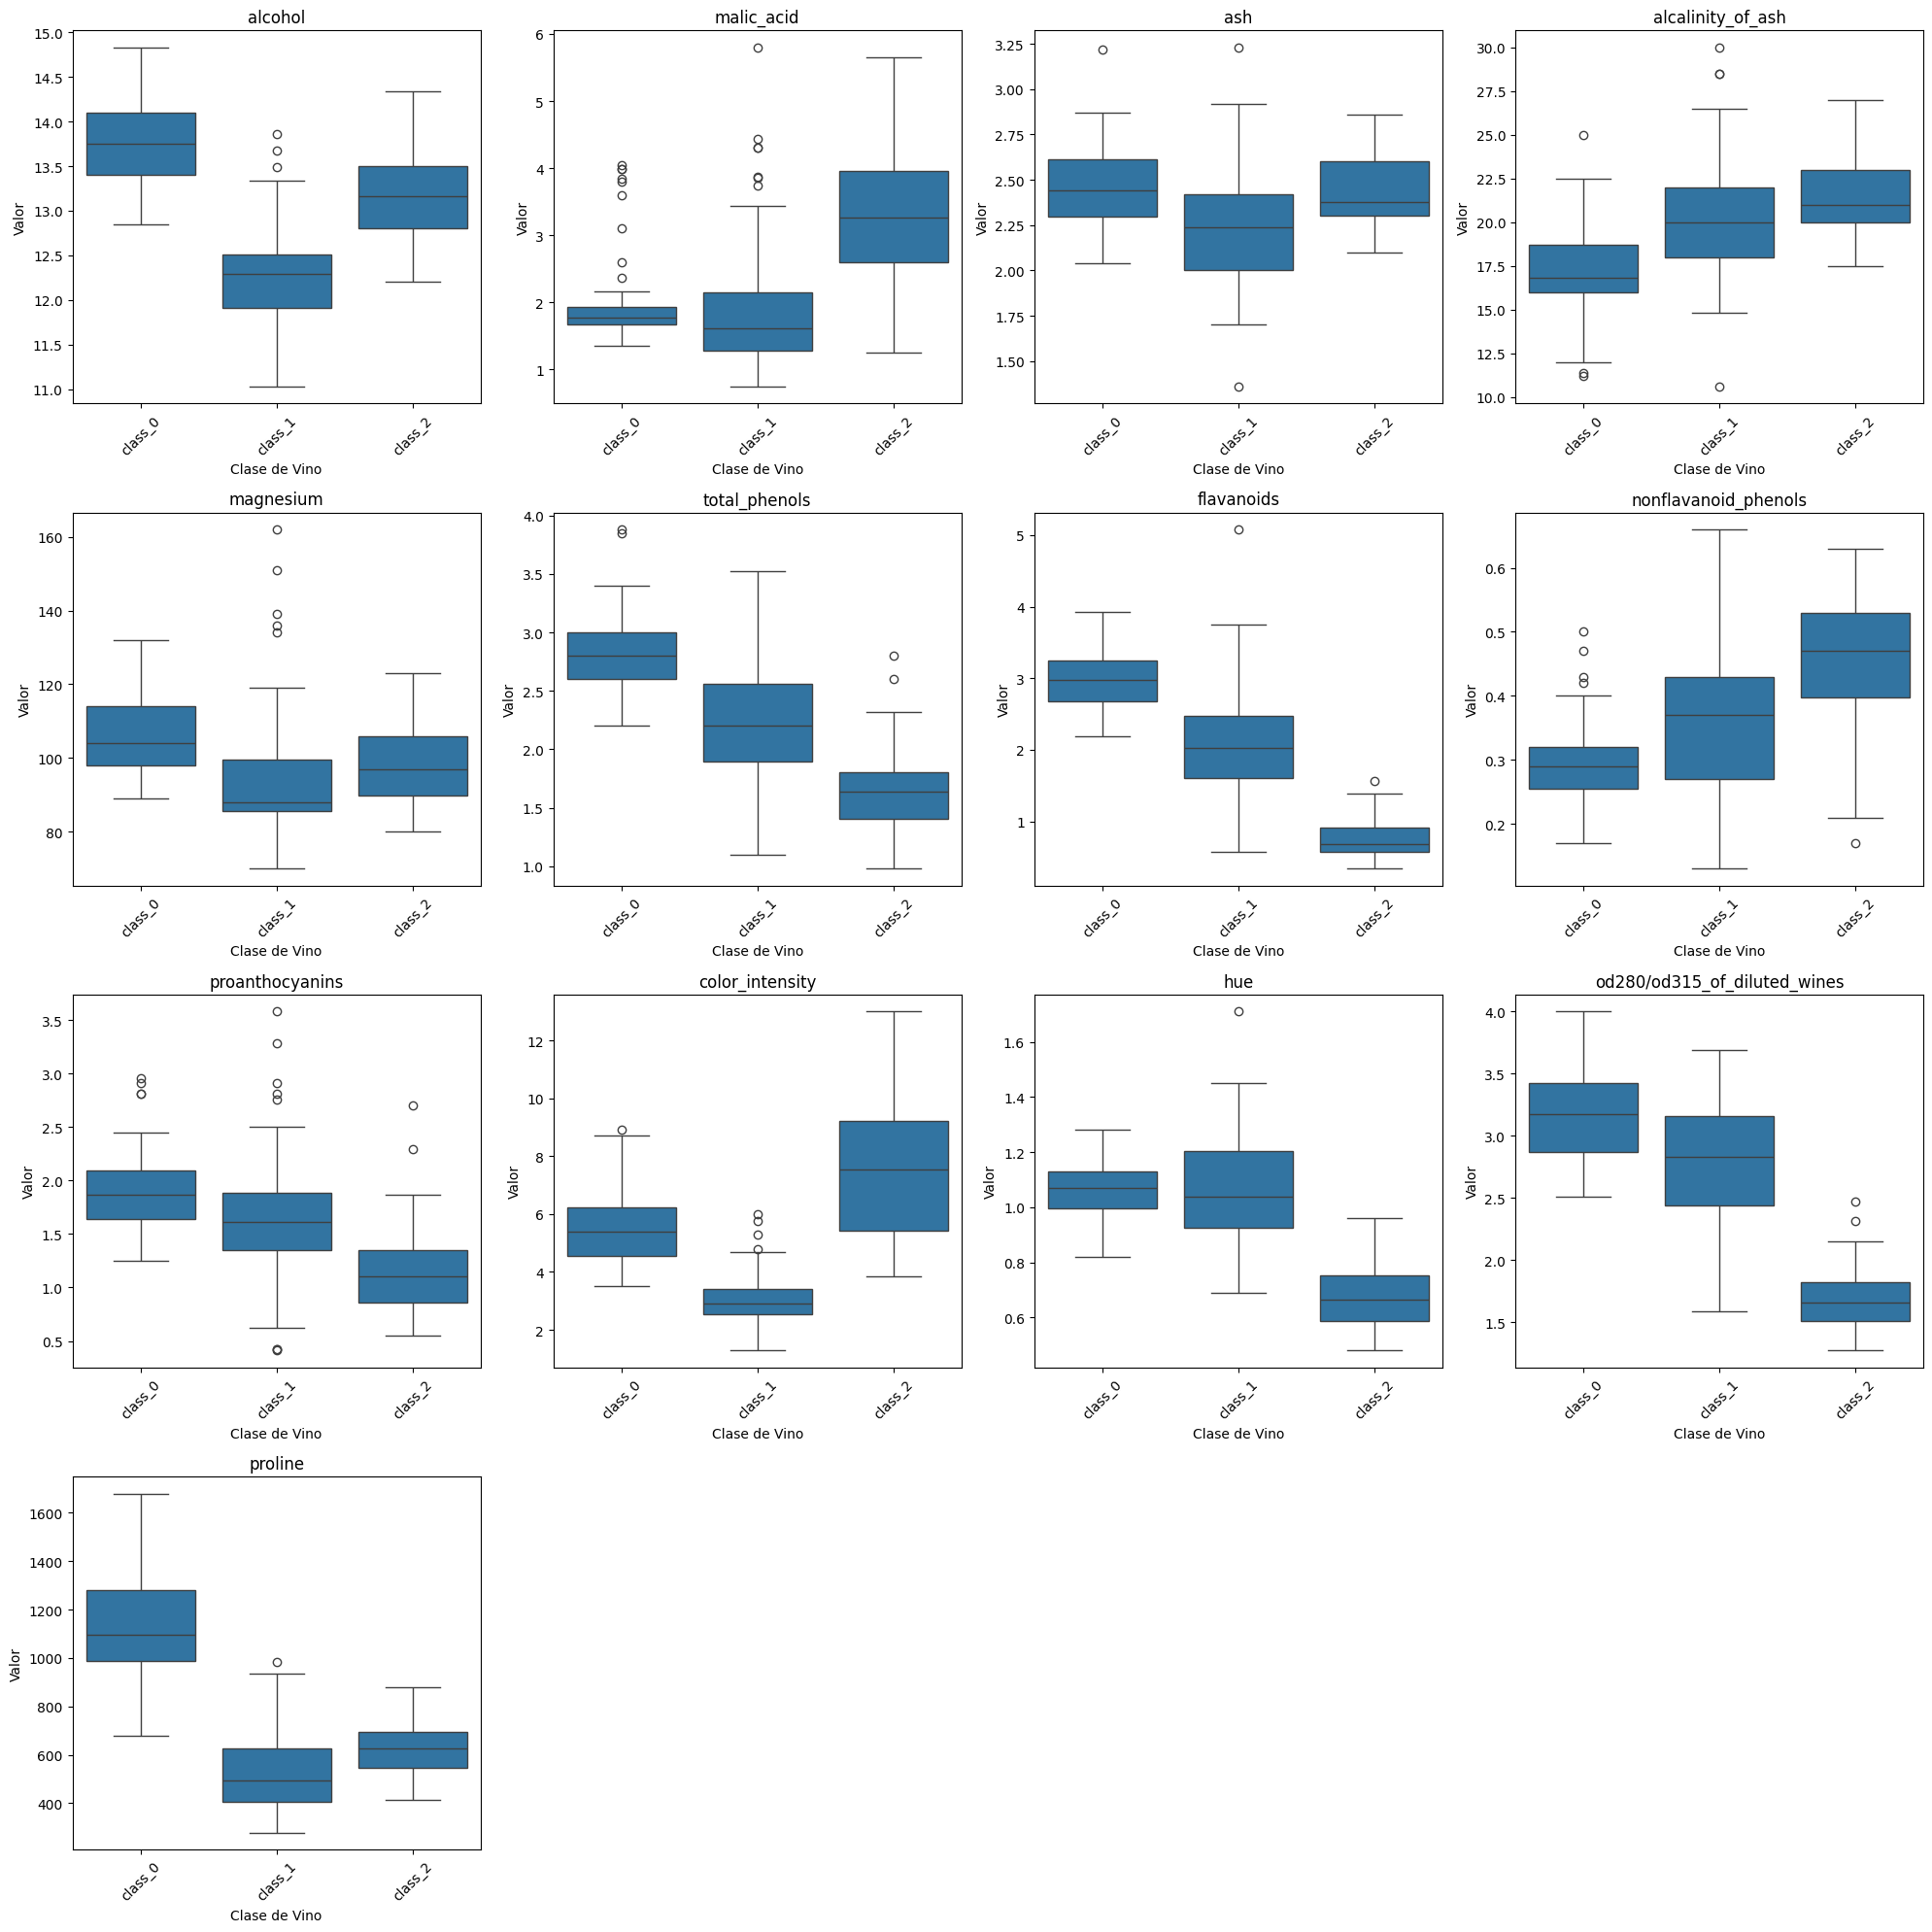

In [4]:
# Visualización de la distribución de todas las características
plt.figure(figsize=(20, 20))

# Crear subplots para todas las características
for i, feature in enumerate(wine.feature_names):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(feature)
    plt.xlabel('Clase de Vino')
    plt.ylabel('Valor')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

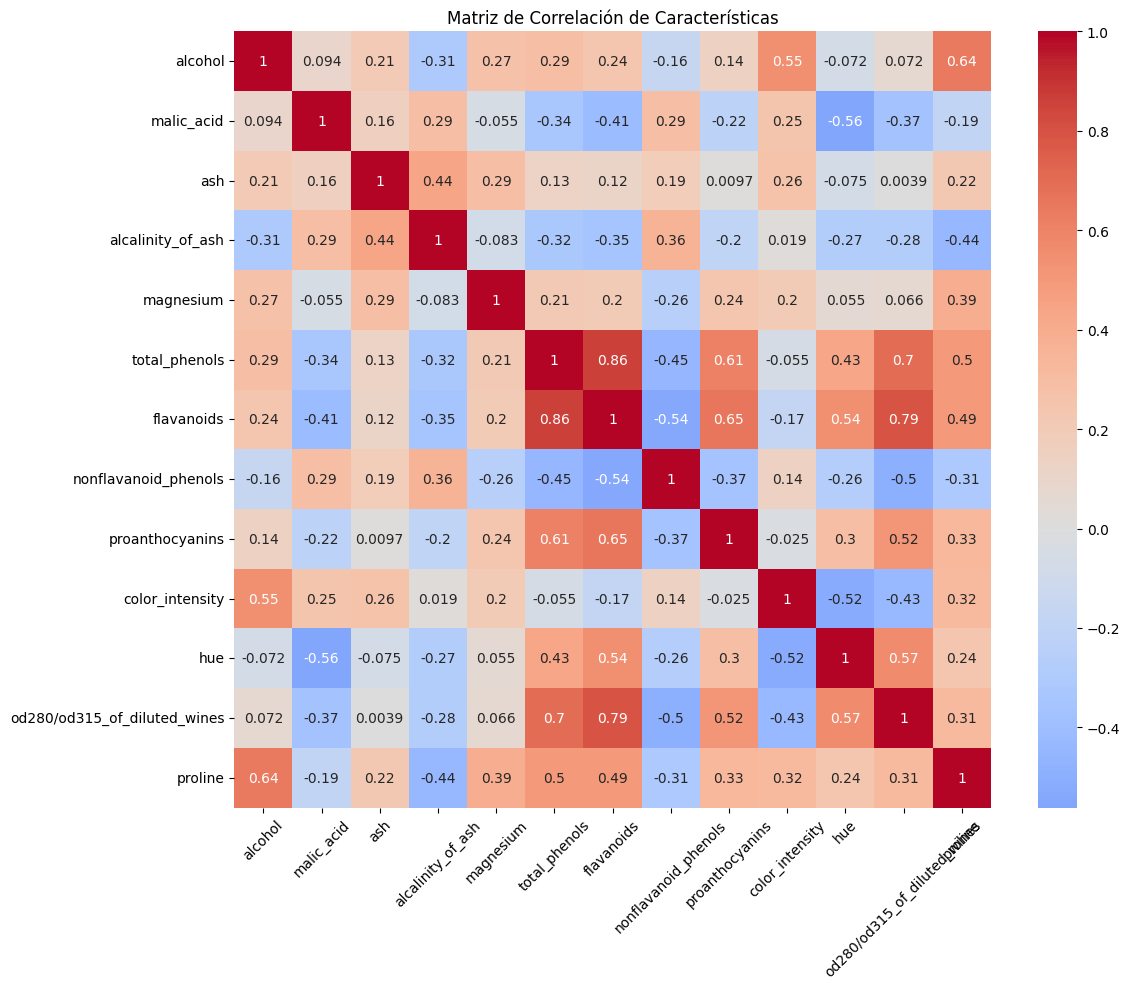

In [5]:
# Matriz de correlación
plt.figure(figsize=(12, 10))
correlation_matrix = X.corr()  # Usamos solo X en lugar de df
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Características')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

correlations = correlation_matrix.abs().mean().sort_values(ascending=False)

¿Qué aprendemos de la matriz de correlación? (sin la variable objetivo)

Mirando la matriz de correlación, vemos cómo se relacionan las variables entre sí. Por ejemplo:

- Hay algunas variables que están muy relacionadas, como `total_phenols` y `flavanoids` (~0.86), o `color_intensity` y `hue` (que tienen una correlación negativa interesante).
- Otras variables casi no tienen relación entre sí (correlación cercana a cero).

¿Qué podemos saber solo con esto?
- Si dos variables están muy correlacionadas, probablemente estén contando la misma historia. Esto es útil para no duplicar información en nuestro modelo.
- Podemos ver qué variables tienden a moverse juntas, lo que nos da una idea de cómo se estructura la información en nuestros datos.
- No nos dice cuál variable es más importante para predecir la clase, pero sí nos avisa que variables muy correlacionadas probablemente tengan un impacto similar en el modelo.

Es importante notar:
- La matriz solo nos muestra relaciones lineales. Puede haber otros tipos de relaciones que no vemos acá.
- No podemos decir que una variable causa la otra, solo que están relacionadas.
- Todo esto hay que interpretarlo en el contexto de nuestro problema específico.


Importancia de las variables:
                        Variable  Importancia       p-valor
6                     flavanoids   233.925873  3.598586e-50
12                       proline   207.920374  5.783168e-47
11  od280/od315_of_diluted_wines   189.972321  1.393105e-44
0                        alcohol   135.077624  3.319504e-36
9                color_intensity   120.664018  1.162008e-33
10                           hue   101.316795  5.917662e-30
5                  total_phenols    93.733010  2.137670e-28
1                     malic_acid    36.943425  4.127229e-14
3              alcalinity_of_ash    35.771637  9.444473e-14
8                proanthocyanins    30.271383  5.125359e-12
7           nonflavanoid_phenols    27.575417  3.888041e-11
2                            ash    13.312901  4.149968e-06
4                      magnesium    12.429584  8.963395e-06


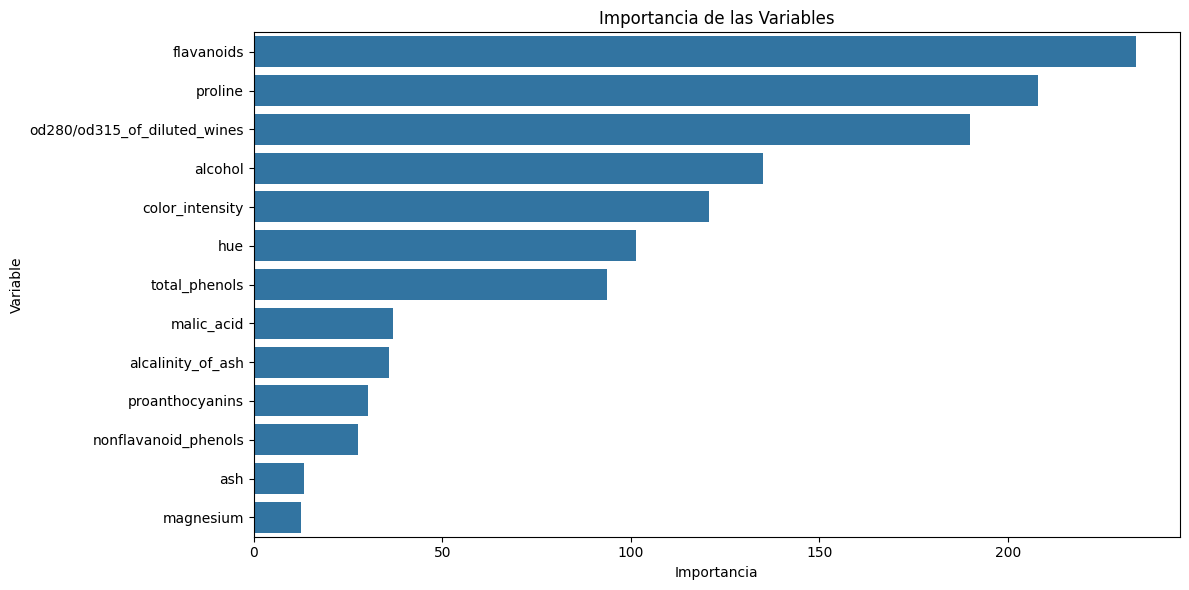

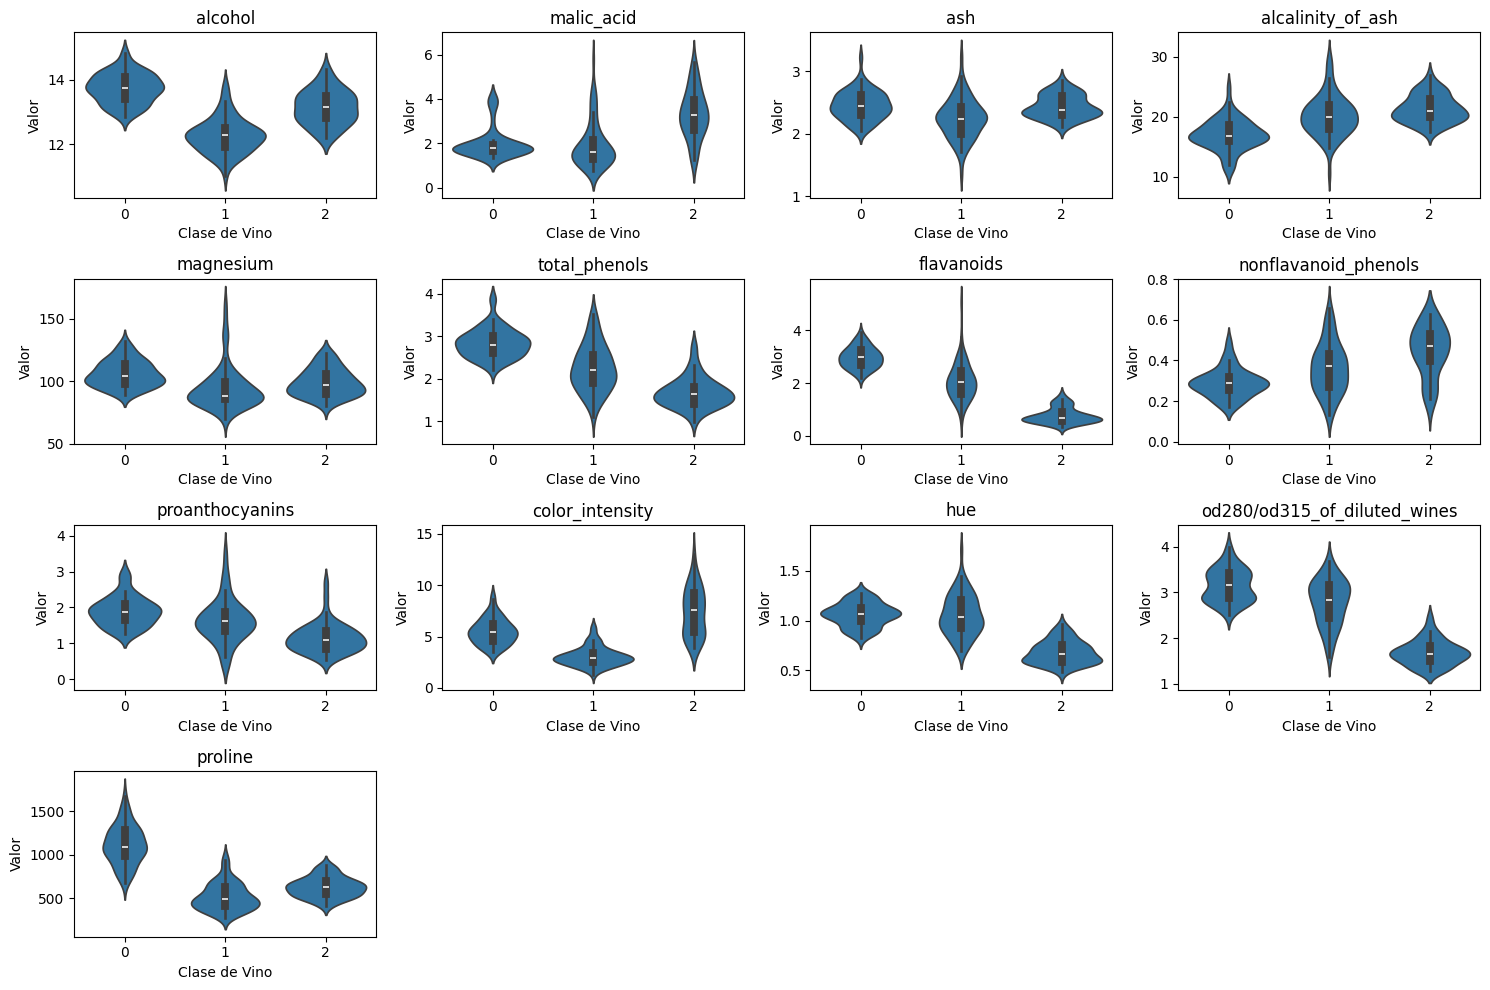

In [6]:
# Vamos a ver qué variables son más importantes para clasificar los vinos
from sklearn.feature_selection import f_classif

# Calculamos qué tan importantes son las variables
f_values, p_values = f_classif(X, y)
importancia = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': f_values,
    'p-valor': p_values
}).sort_values('Importancia', ascending=False)

print("\nImportancia de las variables:")
print(importancia)

# Hacemos un gráfico de barras para ver mejor
plt.figure(figsize=(12, 6))
sns.barplot(x='Importancia', y='Variable', data=importancia)
plt.title('Importancia de las Variables')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

# Y ahora vemos cómo se distribuyen los valores de cada variable según la clase de vino
plt.figure(figsize=(15, 10))
for i, variable in enumerate(X.columns, 1):
    plt.subplot(4, 4, i)
    sns.violinplot(x=y, y=X[variable])
    plt.title(variable)
    plt.xlabel('Clase de Vino')
    plt.ylabel('Valor')
plt.tight_layout()
plt.show()


## 3. Preparación de Datos

Dividimos los datos en conjuntos de entrenamiento y prueba.

In [7]:
# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (142, 13)
Tamaño del conjunto de prueba: (36, 13)


Pregunta: ¿Qué pasa si vamos cambiando el test_size? Si agrandamos y cada vez achicamos mas el conjunto de entrenamiento, ¿qué estrategia va a poder generalizar mejor entre CART y Random Forest?

## 4. Entrenamiento y Evaluación de CART

Entrenamos un árbol de decisión y evaluamos su rendimiento.

Rendimiento de CART:
Precisión: 0.944

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



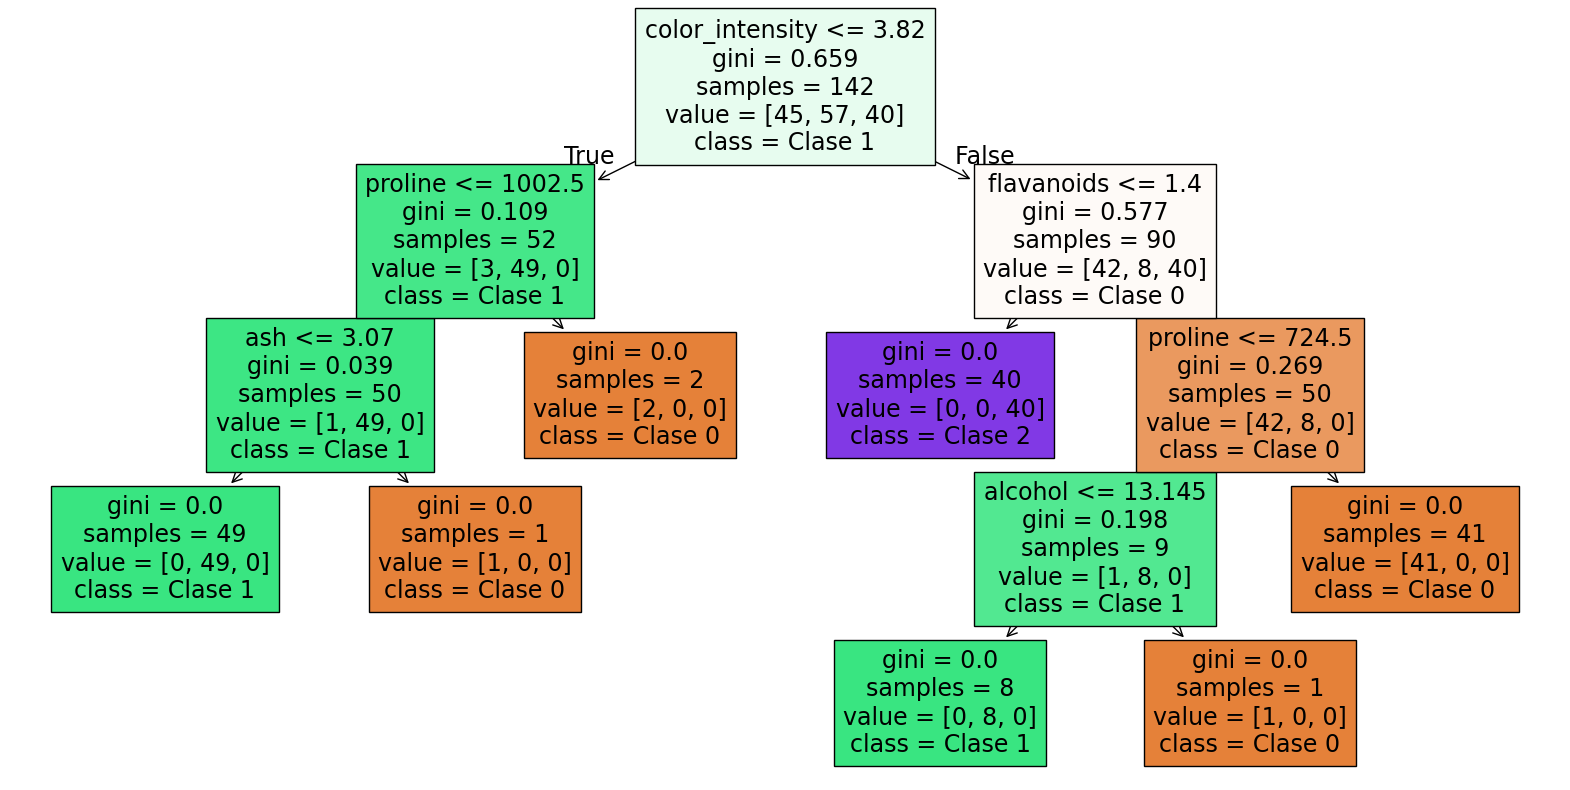

In [8]:
# Entrenamos el modelo CART
cart = DecisionTreeClassifier(random_state=42)
cart.fit(X_train, y_train)

# Realizamos predicciones
y_pred_cart = cart.predict(X_test)

# Evaluamos el modelo
print("Rendimiento de CART:")
print(f"Precisión: {accuracy_score(y_test, y_pred_cart):.3f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_cart))

# Visualizamos el árbol
plt.figure(figsize=(20,10))
plot_tree(cart, feature_names=X.columns, class_names=['Clase 0', 'Clase 1', 'Clase 2'], filled=True)
plt.show()

Nota: En la visualización del árbol, el texto "class = Clase X" al final de cada nodo indica la clase mayoritaria de las muestras que llegan a ese nodo. Por ejemplo, si un nodo muestra "class = Clase 1", significa que la mayoría de las muestras que llegan a ese punto pertenecen a la Clase 1.


## 5. Entrenamiento y Evaluación de Random Forest

Entrenamos un Random Forest y evaluamos su rendimiento.

Rendimiento de Random Forest:
Precisión: 1.000

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



,feature,importance
6,flavanoids,0.202293
9,color_intensity,0.171202
12,proline,0.139046
0,alcohol,0.112398
11,od280/od315_of_diluted_wines,0.111564
10,hue,0.070891
4,magnesium,0.036841
1,malic_acid,0.035703
3,alcalinity_of_ash,0.032425
5,total_phenols,0.029279


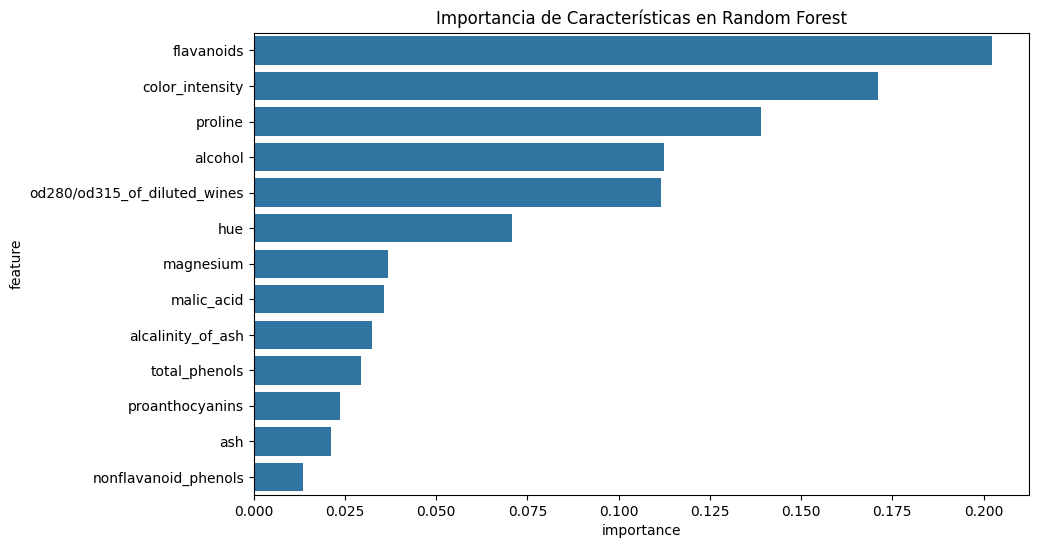

In [9]:
# Entrenamos el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Realizamos predicciones
y_pred_rf = rf.predict(X_test)

# Evaluamos el modelo
print("Rendimiento de Random Forest:")
print(f"Precisión: {accuracy_score(y_test, y_pred_rf):.3f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_rf))

# Visualizamos la importancia de las características
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

# Mostramos la tabla de importancia de características
display(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Importancia de Características en Random Forest')
plt.show()

## 6. Comparación de Modelos

Comparamos las matrices de confusión de ambos modelos.

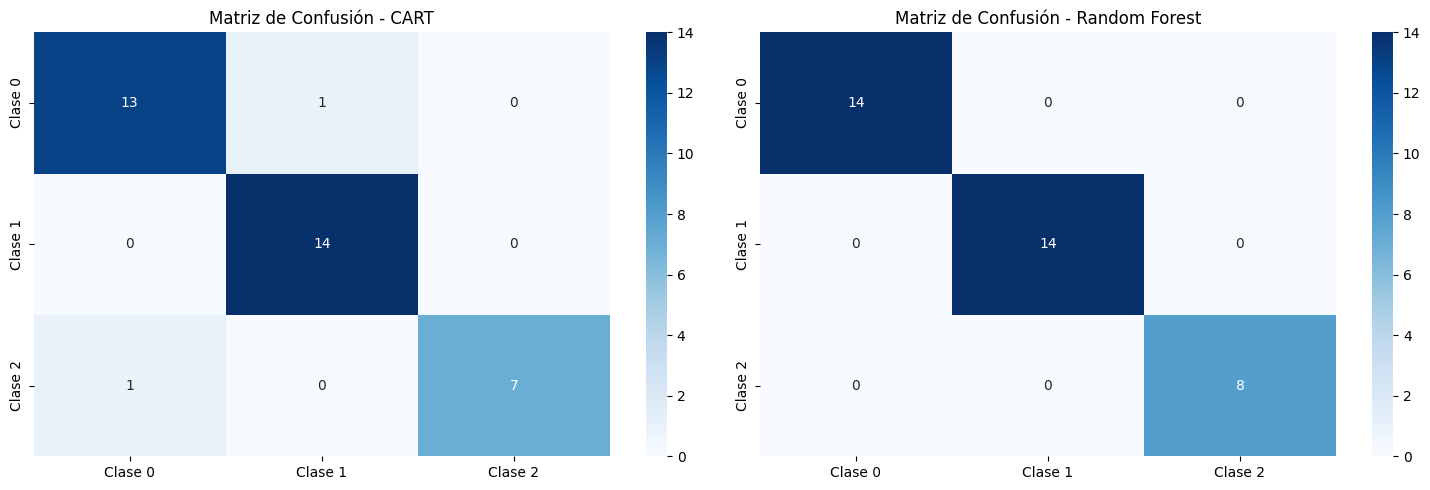

In [10]:
# Matrices de confusión
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# CART
sns.heatmap(confusion_matrix(y_test, y_pred_cart), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Clase 0', 'Clase 1', 'Clase 2'],
            yticklabels=['Clase 0', 'Clase 1', 'Clase 2'],
            ax=ax1)
ax1.set_title('Matriz de Confusión - CART')

# Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Clase 0', 'Clase 1', 'Clase 2'],
            yticklabels=['Clase 0', 'Clase 1', 'Clase 2'],
            ax=ax2)
ax2.set_title('Matriz de Confusión - Random Forest')

plt.tight_layout()
plt.show()

In [11]:
# Análisis detallado de errores y comparación de modelos

# 1. Análisis de errores de CART
print("Análisis de errores de CART:")
cart_errors = y_test[y_test != y_pred_cart]
cart_error_indices = np.where(y_test != y_pred_cart)[0]
print(f"\nNúmero total de errores de CART: {len(cart_errors)}")

# Mostrar las características de las muestras mal clasificadas por CART
print("\nCaracterísticas de las muestras mal clasificadas por CART:")
error_samples = X_test.iloc[cart_error_indices].copy()  # Create a copy to avoid SettingWithCopyWarning
error_samples.loc[:, 'Clase Real'] = y_test.iloc[cart_error_indices]
error_samples.loc[:, 'Predicción CART'] = y_pred_cart[cart_error_indices]
display(error_samples)


Análisis de errores de CART:

Número total de errores de CART: 2

Características de las muestras mal clasificadas por CART:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Clase Real,Predicción CART
24,13.5,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0,0,1
150,13.5,3.12,2.62,24.0,123.0,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500.0,2,0


In [12]:
# 2. Análisis de errores de Random Forest
print("\nAnálisis de errores de Random Forest:")
rf_errors = y_test[y_test != y_pred_rf]
rf_error_indices = np.where(y_test != y_pred_rf)[0]
print(f"\nNúmero total de errores de Random Forest: {len(rf_errors)}")


Análisis de errores de Random Forest:

Número total de errores de Random Forest: 0


In [13]:
# 3. Comparación detallada de predicciones
comparison_df = pd.DataFrame({
    'Clase Real': y_test,
    'Predicción CART': y_pred_cart,
    'Predicción RF': y_pred_rf
})

# Identificar casos donde CART falló pero RF acertó
cart_failed_rf_success = comparison_df[
    (comparison_df['Clase Real'] != comparison_df['Predicción CART']) & 
    (comparison_df['Clase Real'] == comparison_df['Predicción RF'])
]

print("\nCasos donde CART falló pero Random Forest acertó:")
print(f"Número de casos: {len(cart_failed_rf_success)}")
print("\nDetalles de estos casos:")
display(cart_failed_rf_success)


Casos donde CART falló pero Random Forest acertó:
Número de casos: 2

Detalles de estos casos:


,Clase Real,Predicción CART,Predicción RF
24,0,1,0
150,2,0,2


In [14]:
# 4. Análisis de las características más importantes para los casos difíciles
print("\nAnálisis de características para casos difíciles:")
difficult_cases = X_test.loc[cart_failed_rf_success.index].copy()
difficult_cases['Clase Real'] = y_test.loc[cart_failed_rf_success.index]
print("\nEstadísticas de las características para casos difíciles:")
display(difficult_cases.describe())


Análisis de características para casos difíciles:

Estadísticas de las características para casos difíciles:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Clase Real
count,2.0,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000
mean,13.5,2.46500,2.615000,22.000000,109.500000,1.965000,2.090000,0.250000,1.455000,6.060000,0.855000,2.560000,672.50000,1.000000
std,0.0,0.92631,0.007071,2.828427,19.091883,0.799031,0.735391,0.042426,0.289914,3.592102,0.374767,1.781909,243.95184,1.414214
min,13.5,1.81000,2.610000,20.000000,96.000000,1.400000,1.570000,0.220000,1.250000,3.520000,0.590000,1.300000,500.00000,0.000000
25%,13.5,2.13750,2.612500,21.000000,102.750000,1.682500,1.830000,0.235000,1.352500,4.790000,0.722500,1.930000,586.25000,0.500000
50%,13.5,2.46500,2.615000,22.000000,109.500000,1.965000,2.090000,0.250000,1.455000,6.060000,0.855000,2.560000,672.50000,1.000000
75%,13.5,2.79250,2.617500,23.000000,116.250000,2.247500,2.350000,0.265000,1.557500,7.330000,0.987500,3.190000,758.75000,1.500000
max,13.5,3.12000,2.620000,24.000000,123.000000,2.530000,2.610000,0.280000,1.660000,8.600000,1.120000,3.820000,845.00000,2.000000



Importancia de características para casos específicos:


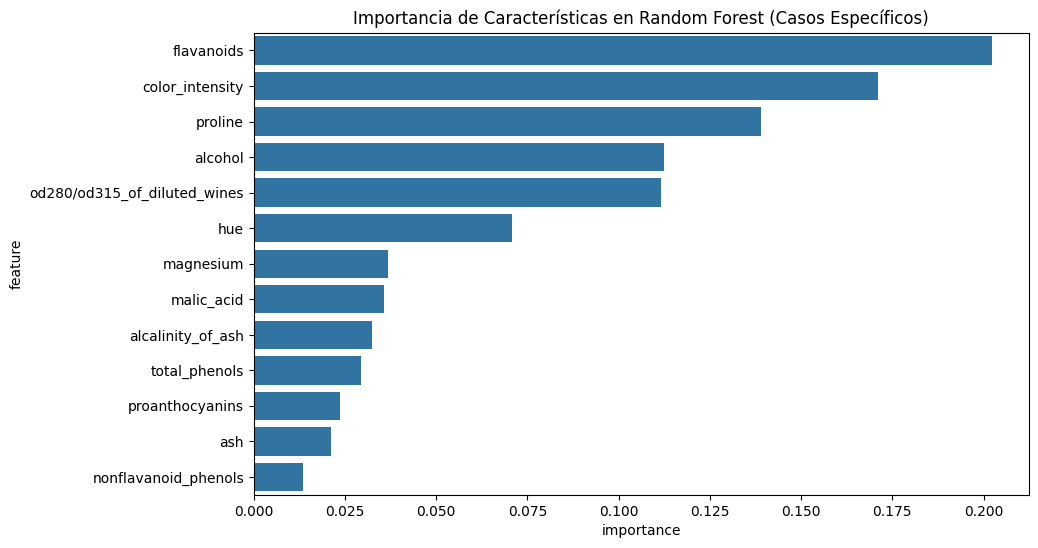

In [15]:
# 5. Análisis de la importancia de características para casos específicos
print("\nImportancia de características para casos específicos:")
feature_importance_specific = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_specific)
plt.title('Importancia de Características en Random Forest (Casos Específicos)')
plt.show()

In [16]:
# 7. Resumen de hallazgos
print("\nResumen de hallazgos:")
print(f"1. CART cometió {len(cart_errors)} errores")
print(f"2. Random Forest cometió {len(rf_errors)} errores")
print(f"3. Random Forest mejoró {len(cart_failed_rf_success)} casos que CART clasificó incorrectamente")
print("\nLas características más importantes para la clasificación correcta fueron:")
display(feature_importance_specific.head(5))


Resumen de hallazgos:
1. CART cometió 2 errores
2. Random Forest cometió 0 errores
3. Random Forest mejoró 2 casos que CART clasificó incorrectamente

Las características más importantes para la clasificación correcta fueron:


,feature,importance
6,flavanoids,0.202293
9,color_intensity,0.171202
12,proline,0.139046
0,alcohol,0.112398
11,od280/od315_of_diluted_wines,0.111564


Es interesante notar que al principio del análisis, encontramos las mismas 5 características más importantes, pero en un orden diferente:
1. flavanoids
2. proline
3. od280/od315_of_diluted_wines
4. alcohol
5. color_intensity

Esto puede ocurrir por varias razones:
1. El EDA inicial nos da una visión general de la importancia de las variables, basado en correlación, varianza y alguna cosa más.
2. El modelo CART, al ser un árbol de decisión único y un algoritmo greedy, puede quedarse atascado en un mínimo local y ver las relaciones de manera diferente.
3. El orden puede cambiar porque CART busca la mejor división en cada nodo de manera local, sin considerar el impacto global, de vuelta, porque es un algoritmo greedy.